In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

[Jump_to opening comments and overview of lesson 10](https://course.fast.ai/videos/?lesson=10&t=108)

## 1. Callbacks

### 1A. Callbacks as GUI events

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=432)

In [3]:
import ipywidgets as widgets

From the [ipywidget docs](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html):

- *the button widget is used to handle mouse clicks. The on_click method of the Button can be used to register function to be called when the button is clicked*

In [4]:
# instantiate a widget object with a label 'Click me'
w = widgets.Button(description='Click me')

In [5]:
# define a function to associate with the widget
def f(o): 
    print('hi')

In [6]:
# define what happens when the widget is clicked
w.on_click(f)

In [7]:
# create and test the widget
# click on the widget when it appears!
w

Button(description='Click me', style=ButtonStyle())

*NB: When callbacks are used in this way they are often called "events".*

Did you know what you can create interactive apps in Jupyter with these widgets? Here's an example from [plotly](https://plot.ly/python/widget-app/):

![](https://cloud.githubusercontent.com/assets/12302455/16637308/4e476280-43ac-11e6-9fd3-ada2c9506ee1.gif)

### 1B. Creating your own callback

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=680)

In [8]:
# get the sleep timer
from time import sleep

In [9]:
# example of using sleep to delay completion of each iteration of a loop
def slow_calculation():
    result = 0
    delay = 1
    for i in range(5):
        result += i*i
        sleep(delay)
    return result

In [10]:
%%timeit
# looks like the argument of sleep is the number of seconds to delay
slow_calculation()

5 s ± 495 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
# delay, then if there is a callback function, execute it before returning the result
def slow_calculation(callback=None,delay=1):
    result = 0
    for i in range(5):
        result += i*i
        sleep(delay)
        if callback: callback(i)
    return result

In [12]:
# function to print epoch number
def show_progress(epoch):
    print(f"Awesome! We've finished epoch {epoch}!")

In [13]:
# pass show_progress to slow_calculation as a callback
slow_calculation(show_progress)

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

### 1C. Lambdas and partials

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=811)

### lambda functions

In [14]:
# another approach: pass an inline function that does the same as show_progress
slow_calculation(lambda o: print(f"Awesome! We've finished epoch {o}!"))

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

In [15]:
# modify to include an exclamation string to replace "Awesome!"
def show_progress(exclamation, epoch):
    print(f"{exclamation}! We've finished epoch {epoch}!")

In [16]:
# try it
slow_calculation(lambda o: show_progress("OK I guess", o))

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

In [17]:
# given an exclamation string, return an inline function that does the same thing as show_progress 
def make_show_progress(exclamation):
    _inner = lambda epoch: print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [18]:
# pass an exclamation string to the function _inner then pass _inner to slow_calculation 
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [19]:
# revise to return the lambda function
# this is called a "closure"
def make_show_progress(exclamation):
    # Leading "_" is generally understood to be "private"
    def _inner(epoch): print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [20]:
# run again
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [21]:
# name f2 as the output of make_show_progress
f2 = make_show_progress("Terrific")

In [22]:
# try again
slow_calculation(f2)

Terrific! We've finished epoch 0!
Terrific! We've finished epoch 1!
Terrific! We've finished epoch 2!
Terrific! We've finished epoch 3!
Terrific! We've finished epoch 4!


30

In [23]:
# try again
slow_calculation(make_show_progress("Amazing"))

Amazing! We've finished epoch 0!
Amazing! We've finished epoch 1!
Amazing! We've finished epoch 2!
Amazing! We've finished epoch 3!
Amazing! We've finished epoch 4!


30

### partial functions

In [24]:
# import the library to make partial functions
from functools import partial

In [25]:
# partial call to show_progress, passing the exclamation input by default, so it only needs the epoch input
slow_calculation(partial(show_progress, "OK I guess"))

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

In [26]:
# name the partial function produced by show_progress
f2 = partial(show_progress, "OK I guess")
f2

functools.partial(<function show_progress at 0x000001DEDC9E9268>, 'OK I guess')

In [27]:
# pass the partial function produced by show_progress to slow_calculation
slow_calculation(f2)

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

### we can use python's help() function to describe an object

In [28]:
# use help function to describe the object
help(f2)

Help on partial object:

class partial(builtins.object)
 |  partial(func, *args, **keywords) - new function with partial application
 |  of the given arguments and keywords.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(...)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descripto

### python's dir() command returns a complete list of attributes
Attributes prefaced by __ are private, intended (but not forced) to be 'encapsulated' inside the class.

Attributes without a __ preface are intended to be accessible from the public interface.


In [29]:
# look at the 'attributes' of the f2 object
dir(f2)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'args',
 'func',
 'keywords']

In [30]:
# Public attributes of f2
print(partial(show_progress, "OK I guess").args)
print(partial(show_progress, "OK I guess").func)
print(partial(show_progress, "OK I guess").keywords)

('OK I guess',)
<function show_progress at 0x000001DEDC9E9268>
{}


### 1D. Callbacks as callable classes

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=1122)

In [31]:
class ProgressShowingCallback():
    def __init__(self, exclamation="Awesome"): self.exclamation = exclamation
    def __call__(self, epoch): print(f"{self.exclamation}! We've finished epoch {epoch}!")

In [32]:
# instantiate the callback
cb = ProgressShowingCallback("Just super")

In [33]:
# examine the attributes of cb
dir(cb)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'exclamation']

In [34]:
# see the 'exclamation'attribute
print(cb.exclamation)

Just super


In [35]:
# pass the callback to the function
slow_calculation(cb)

Just super! We've finished epoch 0!
Just super! We've finished epoch 1!
Just super! We've finished epoch 2!
Just super! We've finished epoch 3!
Just super! We've finished epoch 4!


30

In [38]:
# what would've happened if we didn't supply and input?
cb = ProgressShowingCallback()
print(cb.exclamation)

Awesome


### 1F. Modifying the behavior of a function using a callback class

### *args and **kwargs

`*args` and `**kwargs` are used to pass a variable number of non-keyworded arguments and keyworded lists (dictionaries) of arguments into a function, to make its behavior more flexible.

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=1194)

In [39]:
# example function with args and kwargs
# *args is a non-keyword argument list
# **kwargs is a keyworded dictionary
def f(*args, **kwargs): 
    print(f"args: {args}; kwargs: {kwargs}")

In [40]:
# example of calling this function
f(3, 'a', thing1="hello")

args: (3, 'a'); kwargs: {'thing1': 'hello'}


NB: We've been guilty of over-using kwargs in fastai - it's very convenient for the developer, but is annoying for the end-user unless care is taken to ensure docs show all kwargs too. kwargs can also hide bugs (because it might not tell you about a typo in a param name). In [R](https://www.r-project.org/) there's a very similar issue (R uses `...` for the same thing), and matplotlib uses kwargs a lot too.

### Example: encapsulating callbacks in a callback class

In [41]:
# define a callback class that contains two different callbacks
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, *args, **kwargs): print(f"About to start")
    def after_calc (self, *args, **kwargs): print(f"Done step")

In [42]:
# define a function whose behavior can be modified by a callback class that is passed in
def slow_calculation(callback=None,delay=1):
    result = 0
    for i in range(5):
        if callback: 
            callback.before_calc(i)
        result += i*i
        sleep(delay)
        if callback: 
            callback.after_calc(i, val=result)
    return result

In [43]:
# execute the function
slow_calculation(PrintStepCallback())

About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step


30

In [46]:
# modify the callback class to report the epoch before the calculation, and the result at this epoch
class PrintStatusCallback():
    def __init__(self): pass
    def before_calc(self, epoch, **kwargs): 
        print(f"About to start: {epoch}")
    def after_calc (self, epoch, val, **kwargs): 
        print(f"After {epoch}: {val}")

In [47]:
# execute the same function with the new callback class
slow_calculation(PrintStatusCallback())

About to start: 0
After 0: 0
About to start: 1
After 1: 1
About to start: 2
After 2: 5
About to start: 3
After 3: 14
About to start: 4
After 4: 30


30

In [53]:
# execute the function with no inputs passed in
# the function is designed so that it still works if no callback class is passed in!
slow_calculation()

30

### Example: slow_calculation with an early stopping callback

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=1454)

In [54]:
# modify function to check for presence of callbacks and conditionally execute 
#     the actions associated with those callbacks
#     note -- we have passed an extra input,
#         a keyword arg max_val, which controls when early stopping occurs
def slow_calculation(callback=None,delay=1, max_val=10):
    result = 0
    for i in range(5):
        if callback and hasattr(callback,'before_calc'): 
            callback.before_calc(i)
        result += i*i
        sleep(delay)
        if callback and hasattr(callback,'after_calc'):
            if callback.after_calc(i, result, max_val):
                print("stopping early")
                break
    return result

In [56]:
# create a class with a callback that tests for and sets early stopping condition
class PrintAfterCallback():
    def after_calc (self, epoch, val, max_val):
        print(f"After {epoch}: {val}")
        if val > max_val: 
            return True

In [57]:
# run the function with the early stopping callback
slow_calculation(PrintAfterCallback(),delay=1)

After 0: 0
After 1: 1
After 2: 5
After 3: 14
stopping early


14

### Example: add flexibility by encapsulating the slow_calculation() function in a class
modify after_calc callback to double the result if result < 3

In [47]:
class SlowCalculator():
    def __init__(self, cb=None): 
        self.cb,self.res = cb,0

    def callback(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb,cb_name, None)
        if cb: return cb(self, *args)

    def calc(self):
        for i in range(5):
            # note that callback 'before_calc' is not defined in ModifyingCallback() below
            self.callback('before_calc', i)
            self.res += i*i
            sleep(1)
            if self.callback('after_calc', i):
                print("stopping early")
                break

class ModifyingCallback():
    def after_calc (self, calc, epoch):
        print(f"After {epoch}: {calc.res}")
        if calc.res>10: return True
        if calc.res<3: calc.res = calc.res*2

In [48]:
# instantiate the object
calculator = SlowCalculator(ModifyingCallback())

### examine the calculator object 

In [49]:
help(calculator)

Help on SlowCalculator in module __main__ object:

class SlowCalculator(builtins.object)
 |  SlowCalculator(cb=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cb=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calc(self)
 |  
 |  callback(self, cb_name, *args)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [50]:
dir(calculator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calc',
 'callback',
 'cb',
 'res']

In [51]:
# run and get the result
calculator.calc()
calculator.res

After 0: 0
After 1: 1
After 2: 6
After 3: 15
stopping early


15

## 2. `__dunder__` thingies

Anything that looks like `__this__` is, in some way, *special*. Python, or some library, can define some functions that they will call at certain documented times. For instance, when your class is setting up a new object, python will call `__init__`. These are defined as part of the python [data model](https://docs.python.org/3/reference/datamodel.html#object.__init__).

For instance, if python sees `+`, then it will call the special method `__add__`. If you try to display an object in Jupyter (or lots of other places in Python) it will call `__repr__`.

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=1647)

In [60]:
class SloppyAdder():
    def __init__(self,o): self.o=o
    def __add__(self,b): return SloppyAdder(self.o + b.o + 0.01)
    def __repr__(self): return str(self.o)

In [61]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a+b

3.01

In [72]:
# __repr__ method
print(a.__repr__())
print(b.__repr__())
print((a+b).__repr__())


1
2
3.01


In [63]:
dir(a)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'o']

### Special methods you should probably know about (see data model link above) are:

- `__getitem__`
- `__getattr__`
- `__setattr__`
- `__del__`
- `__init__`
- `__new__`
- `__enter__`
- `__exit__`
- `__len__`
- `__repr__`
- `__str__`

## 3. Variance, covariance and correlation

### 3A. Variance

Variance is a way to measure the spread or dispersion in data. Noisy data has a high variance.
We'll develop several ways to measure spread and give the definition of variance below.

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=2133)

### Create a tensor with some data, and compute the mean

In [76]:
# create a 1D tensor with some data
data = torch.tensor([1.,2.,4.,18])

In [77]:
# compute the mean of the data
data_mean = data.mean()
print(data_mean)

tensor(6.2500)


### Compute the average deviation from the mean for this data
This doesn't work as a measure of dispersion, because the positives and negatives cancel out. 
We can fix that in one of (at least) two ways:

In [78]:
# average deviation from the mean
# this doesn't measure spread, since negative deviations exactly cancel out positive deviations
(data - data_mean).mean()

tensor(0.)

### What if we squared the deviations before averaging?
This is called the mean squared deviation.

It works s a measure of spread, because the squared deviations are positive

In [79]:
# average squared deviation from the mean
(data - data_mean).pow(2).mean()

tensor(47.1875)

### Alternatively, we could take the absolute value of each deviation before averaging
This is called mean absolute deviation or MAD, and it also works as a measure of spread

In [80]:
# mean of the absolute deviations from the mean
(data - data_mean).abs().mean()

tensor(5.8750)

### Standard deviation is root mean squared deviation, or RMS deviation
Note that the mean squared deviation has the wrong scale, really measures the spread in the squared data. We can restore the scale by taking the square root.

In [81]:
# root mean squared deviation 
(data - data_mean).pow(2).mean().sqrt()

tensor(6.8693)

### Standard deviation vs. MAD

Our two ways to measure dispersion in the data (standard deviation and MAD) give different results. Why?

Note that we have one outlier (`18`). In the standard deviation, where we square everything, it makes that much bigger than everything else.

`(data - data_mean).pow(2).mean()` is refered to as **variance**. It's a measure of how spread out the data is, and is particularly sensitive to outliers, because each deviation contributes as a square.

When we take the sqrt of the variance, we get the **standard deviation**. Since it's on the same kind of scale as the original data, it's generally more interpretable. However, since `sqrt(1)==1`, it doesn't much matter which we use when talking about *unit variance* for initializing neural nets.

`(data - data_mean).abs().mean()` is referred to as the **mean absolute deviation**. It isn't used nearly as much as it deserves to be, because mathematicians don't like how awkward it is to work with. But that shouldn't stop us, because we have computers and stuff.



### Useful expression for variance:
$$ variance(X) \equiv E[(X-\bar{X})^{2}] = E[(X^{2}-2X\bar{X} + \bar{X}^{2})]  = E[X^{2}]-2\bar{X}\bar{X} + \bar{X}^{2} = E[X^{2}] - \bar{X}^{2} = E[X^{2}] - E[X]^{2}$$

In [82]:
# the second expression follows from the first and is more efficient for computation
(data - data_mean).pow(2).mean(), (data*data).mean() - (data_mean*data_mean)

(tensor(47.1875), tensor(47.1875))

You can see why these are equal if you want to work thru the algebra. Or not.

But, what's important here is that the latter is generally much easier to work with. In particular, you only have to track two things: the sum of the data, and the sum of squares of the data. Whereas in the first form you actually have to go thru all the data twice (once to calculate the mean, once to calculate the differences).

Let's go steal the LaTeX from [Wikipedia](https://en.wikipedia.org/wiki/Variance):

$$var[X] = \operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2$$

### 3B. Covariance


The *covariance* of two vectors $X$ and $Y$ is defined as the expectation value of the product of their deviations

From Wikipedia:

$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$

Note that $\operatorname{cov}(X,Y) = \operatorname{var}(X)$ when $X = Y$

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=2414)

Let's see that in code. So now we need two vectors.

In [92]:
t = torch.tensor([1.,2.,4.,18])

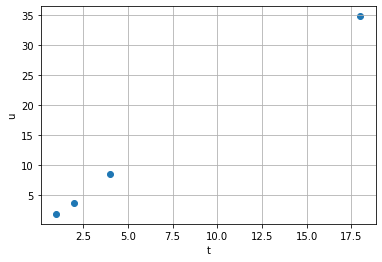

In [84]:
# `u` is twice `t`, plus a bit of randomness
u = t*2
# torch.randn_like(t) means draw a tensor of random normal samples of the same dimension as t
# here, normal means drawn from a zero mean, unit variance Gaussian) 

# scale t with a random multiplicative factor
u *= torch.randn_like(t)/10+0.95

# plot t vs. u
plt.scatter(t, u)
plt.xlabel('t')
plt.ylabel('u')
plt.grid()

In [85]:
# product of t deviations with u deviations
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 54.1176,  36.3268,   8.3884, 265.3595])

In [86]:
# the covariance of two vectors t and u is defined as the expectation value of the product of their deviations
prod.mean()

tensor(91.0481)

tensor([ 0.3284,  0.4688, -0.4844, -1.0213])


Text(0, 0.5, 'v')

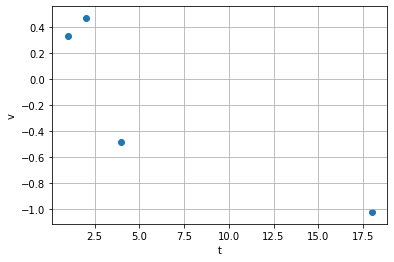

In [87]:
# generate a normal sample v
v = torch.randn_like(t)
print(v)
# plot t against v
plt.scatter(t, v);
plt.grid()
plt.xlabel('t')
plt.ylabel('v')

In [88]:
# covariance of v and t
((t-t.mean())*(v-v.mean())).mean()

tensor(-3.6568)

As with $variance$, $covariance$ also has a more computationally efficient expression, which you are invited to derive:

$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]} = \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]$

In [89]:
# another way to express covariance, obtained by reducing the first expression 
cov = (t*v).mean() - t.mean()*v.mean(); cov

tensor(-3.6568)

From now on, you're not allowed to look at an equation (or especially type it in LaTeX) without also typing it in Python and actually calculating some values. Ideally, you should also plot some values.

## 3C. Correlation

Finally, here is the Pearson correlation coefficient:

$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$$

Pearson's correlation coeffient is just a scaled version of the covariance; it measures *linear correlation* between two vectors, i.e. how closely they are proportional to one other.

Question: *Why is it scaled by standard deviation, and not by variance or mean or something else?*

Note that with this scaling, $\rho_{X,Y} = 1$ if $X = cY$, and $\rho_{X,Y} = -1$ if $X = -cY$, where $c$ is a positive constant

In [90]:
# the Pearson correlation coefficient ranges from -1 perfect anticorrelation to 1 perfect correlation
rho = cov / (t.std() * v.std())
print(rho)

tensor(-0.6564)


## 4. Softmax

Here's our final `logsoftmax` definition:
Caveat, it doesn't include the "logsumexp trick"!

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=2674)

In [91]:
def log_softmax(x): return x - x.exp().sum(-1,keepdim=True).log()

which is:

$$\hbox{logsoftmax(x)}_{i} = x_{i} - \log \sum_{j} e^{x_{j}}$$ 

And our cross entropy loss is:
$$loss(x_{i},p_{i}) = -\log(p_{i})$$

## 5. Browsing source code

[Jump_to lesson 10 video](https://course.fast.ai/videos/?lesson=10&t=1782)

### Things your editor of choice should be able to do
In the lecture, Jeremy demonstrates these in vim, his editor of choice
### some editors are emacs visual studio, sublime, vim
- Jump to tag/symbol by with (with completions)
- Jump to current tag
- Jump to library tags
- Go back
- Search
- Outlining / folding